# Loading and Viewing the Data

In [1]:
#Name: Berke Derin Berktay
#First, we need to import the necessary libraries that we are going to use further on into the study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#we first read the excel file's sheet labelled as 'data'
df = pd.read_excel('INF2178_A1_data.xlsx', 'data')
df

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,YWCA Toronto,14671,YWCA Davenport - Youth,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN
50940,2021-12-31,Youth Without Shelter,12292,Youth without Shelter Emergency Shelter Program,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN
50941,2021-12-31,Youth Without Shelter,12291,Youth without Shelter Stay In School Program,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN
50942,2021-12-31,YouthLink,14891,YouthLink Emergency Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN


In [2]:
df.head #let us try to get the sense of the data by simply observing it

<bound method NDFrame.head of       OCCUPANCY_DATE         ORGANIZATION_NAME  PROGRAM_ID  \
0         2021-01-01  COSTI Immigrant Services       15371   
1         2021-01-01  COSTI Immigrant Services       16211   
2         2021-01-01  COSTI Immigrant Services       16192   
3         2021-01-01  COSTI Immigrant Services       16191   
4         2021-01-01  COSTI Immigrant Services       16193   
...              ...                       ...         ...   
50939     2021-12-31              YWCA Toronto       14671   
50940     2021-12-31     Youth Without Shelter       12292   
50941     2021-12-31     Youth Without Shelter       12291   
50942     2021-12-31                 YouthLink       14891   
50943     2021-12-31                 YouthLink       14911   

                                            PROGRAM_NAME       SECTOR  \
0           COSTI North York West Hotel - Family Program     Families   
1          COSTI North York West Hotel - Seniors Program  Mixed Adult   
2     

# Checking zero and null values

In [3]:
#First, let us perform some data wrangling to ensure that our data at hand is top notch.
#Let us check the amount of null and 0 values for each variable to see if we should replace or delete 
#some of these values/columns if there are too many or too little missing.
def emptyandzero(df):
    empty_cells = df.isna().sum()
    print("EMPTY CELL COUNTS:")
    print(empty_cells)
    
    numerics = df.select_dtypes(include=np.number)
    zeroes = []
    for i in range(len(numerics.columns)):
        zeroes.append(numerics.columns[i])
        zeroes.append((numerics[numerics.columns[i]] == 0).sum())
    print("\nZERO CELL COUNTS:")
    print(zeroes)
    

In [4]:
emptyandzero(df)

EMPTY CELL COUNTS:
OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                 35
SECTOR                        0
PROGRAM_MODEL                 2
OVERNIGHT_SERVICE_TYPE        2
PROGRAM_AREA                  2
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32399
OCCUPIED_ROOMS            32399
dtype: int64

ZERO CELL COUNTS:
['PROGRAM_ID', 0, 'SERVICE_USER_COUNT', 0, 'CAPACITY_ACTUAL_BED', 0, 'OCCUPIED_BEDS', 0, 'CAPACITY_ACTUAL_ROOM', 0, 'OCCUPIED_ROOMS', 0]


In [5]:
print(len(df)) # we see that the total length of the data, which is 50944, is equal to 
#null bed entries (18545) + null room entries (32399). Therefore each row has an entry regarding either
#beds or the rooms.

50944


In [6]:
df[df["PROGRAM_MODEL"].isna()] #Let us check the cases where program model is null, turns out that these two cases
# are also where the overnight service type and the program area are also empty.

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
50757,2021-12-30,Homes First Society,16631,NaN,Mixed Adult,NaN,NaN,NaN,8,Bed Based Capacity,10.0,8.0,NaN,NaN
50893,2021-12-31,Homes First Society,16631,NaN,Mixed Adult,NaN,NaN,NaN,15,Bed Based Capacity,21.0,15.0,NaN,NaN


In [7]:
#Though a lot of useful informaiton like the program model is not available, I will keep them instead of deleting
#in this case since column entries like Sector and the service user count are not null, these two entries might
#still be useful

# Feature Engineering

In [8]:
#Now, let us perform some feature engineering to see if we can delete some useless columns and/or create useful ones

In [9]:
df[ df["PROGRAM_ID"] == 16051]

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
16,2021-01-01,City of Toronto,16051,Woodgreen Interim Housing 1 - Mixed Adult Program,Mixed Adult,Emergency,Interim Housing,COVID-19 Response,5,Room Based Capacity,NaN,NaN,5.0,5.0
157,2021-01-02,City of Toronto,16051,Woodgreen Interim Housing 1 - Mixed Adult Program,Mixed Adult,Emergency,Interim Housing,COVID-19 Response,5,Room Based Capacity,NaN,NaN,5.0,5.0
298,2021-01-03,City of Toronto,16051,Woodgreen Interim Housing 1 - Mixed Adult Program,Mixed Adult,Emergency,Interim Housing,COVID-19 Response,5,Room Based Capacity,NaN,NaN,5.0,5.0
439,2021-01-04,City of Toronto,16051,Woodgreen Interim Housing 1 - Mixed Adult Program,Mixed Adult,Emergency,Interim Housing,COVID-19 Response,5,Room Based Capacity,NaN,NaN,5.0,5.0
581,2021-01-05,City of Toronto,16051,Woodgreen Interim Housing 1 - Mixed Adult Program,Mixed Adult,Emergency,Interim Housing,COVID-19 Response,5,Room Based Capacity,NaN,NaN,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22173,2021-06-05,City of Toronto,16051,Woodgreen Interim Housing 1 - Mixed Adult Program,Mixed Adult,Emergency,Interim Housing,COVID-19 Response,2,Room Based Capacity,NaN,NaN,2.0,2.0
22311,2021-06-06,City of Toronto,16051,Woodgreen Interim Housing 1 - Mixed Adult Program,Mixed Adult,Emergency,Interim Housing,COVID-19 Response,2,Room Based Capacity,NaN,NaN,2.0,2.0
22451,2021-06-07,City of Toronto,16051,Woodgreen Interim Housing 1 - Mixed Adult Program,Mixed Adult,Emergency,Interim Housing,COVID-19 Response,2,Room Based Capacity,NaN,NaN,2.0,2.0
22592,2021-06-08,City of Toronto,16051,Woodgreen Interim Housing 1 - Mixed Adult Program,Mixed Adult,Emergency,Interim Housing,COVID-19 Response,2,Room Based Capacity,NaN,NaN,2.0,2.0


In [10]:
df[ df["PROGRAM_ID"] == 16211] # As seen, some programs are active for way more days than others, let us keep this in mind.

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
142,2021-01-02,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,4,Room Based Capacity,NaN,NaN,4.0,4.0
283,2021-01-03,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0


In [12]:
#Throughout the analysis, it is pointless to keep the program name, since the relevant info gathered from this
#column is already present in the organization name and the sector.
df = df.drop(['PROGRAM_NAME'], axis=1)
df[ df["PROGRAM_ID"] == 16211] #check with a random entry

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
1,2021-01-01,COSTI Immigrant Services,16211,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
142,2021-01-02,COSTI Immigrant Services,16211,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,4,Room Based Capacity,NaN,NaN,4.0,4.0
283,2021-01-03,COSTI Immigrant Services,16211,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0


In [13]:
#Now, let us create a column for shelter program occupancy rates in order for healthy comparisons during the t-tests.
df['OCCUPANCY_RATE'] = np.where(df['CAPACITY_TYPE'] == 'Bed Based Capacity',
                                  (df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED'] * 100).round(2),
                                  (df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM'] * 100).round(2))
df #check


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,89.66
1,2021-01-01,COSTI Immigrant Services,16211,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,100.00
2,2021-01-01,COSTI Immigrant Services,16192,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,82.14
3,2021-01-01,COSTI Immigrant Services,16191,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,100.00
4,2021-01-01,COSTI Immigrant Services,16193,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,92.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,YWCA Toronto,14671,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN,30.00
50940,2021-12-31,Youth Without Shelter,12292,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN,100.00
50941,2021-12-31,Youth Without Shelter,12291,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN,92.86
50942,2021-12-31,YouthLink,14891,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN,100.00


In [14]:
# Create a season column that we will use later on
def get_season(date):
    # Extract month from the date
    month = date.month
    # Define the season based on the month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'
df['SEASON'] = df['OCCUPANCY_DATE'].apply(get_season)
df

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE,SEASON
0,2021-01-01,COSTI Immigrant Services,15371,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,89.66,Winter
1,2021-01-01,COSTI Immigrant Services,16211,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,100.00,Winter
2,2021-01-01,COSTI Immigrant Services,16192,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,82.14,Winter
3,2021-01-01,COSTI Immigrant Services,16191,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,100.00,Winter
4,2021-01-01,COSTI Immigrant Services,16193,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,92.86,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,YWCA Toronto,14671,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN,30.00,Winter
50940,2021-12-31,Youth Without Shelter,12292,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN,100.00,Winter
50941,2021-12-31,Youth Without Shelter,12291,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN,92.86,Winter
50942,2021-12-31,YouthLink,14891,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN,100.00,Winter


# Determining which categorical columns to observe based on specifity

In [ ]:
# The more specific divisions = the better the takeaways, the better focus that the government can have for the 
# development purposes.
# We want to observe the categorical variables in the scope of occupancy_rate only

In [45]:
unique_sectors = df['SECTOR'].unique()
for sector in unique_sectors:
    print(sector)

Families
Mixed Adult
Men
Women
Youth


In [46]:
unique_programmodels = df['PROGRAM_MODEL'].unique()
for model in unique_programmodels:
    print(model)

Emergency
Transitional
nan


In [47]:
unique_osts = df['OVERNIGHT_SERVICE_TYPE'].unique()
for ost in unique_osts:
    print(ost)

Motel/Hotel Shelter
Shelter
Interim Housing
Isolation/Recovery Site
24-Hour Respite Site
Warming Centre
24-Hour Women's Drop-in
nan


In [48]:
unique_pas = df['PROGRAM_AREA'].unique()
for pa in unique_pas:
    print(pa)

COVID-19 Response
Base Shelter and Overnight Services System
Temporary Refugee Response
Winter Programs
nan


In [49]:
unique_seasons = df['SEASON'].unique() #we know this but doing it out of formality
for season in unique_seasons:
    print(season)

Winter
Spring
Summer
Autumn


In [51]:
unique_cts = df['CAPACITY_TYPE'].unique() #we know this but doing it out of formality
for ct in unique_cts:
    print(ct)

Room Based Capacity
Bed Based Capacity


In [ ]:
# sector, overnight srevice tyoe, program area, the program model, and the capacity are more concerned with the type of model
#to establish, so we can choose the most specific ones out of these (the ones with the most columns) in order to have
# a more specific agenda when coming up building the types of models in the future. It is better to simply prioritize
#the specific attributes since when building new models in the future, when determining their types, we can not always
#choose the best type of group in each category for the forementioned columns anyways since some might contradict 
#each other's existence
#season is more about the timing, so it should be individually looked at to obtain takeaway ideas
# We want to focus on for more specific takeaways regarding the groupings, so we will look at:
# sector, overnight service type, and seasons vs only the factor of Occupation Rate and not service_user_count
# I decided to not use service user count but only use the occupation rate since the service user count metric can 
#be quite decieving since it completely disregards the capacity, more on that on the report

# Observing the relation between Sector and the Occupation Rate

In [15]:
#Now let us compute the occupancy rate for each type of sector
#First we look at the types of sectors.
unique_sectors = df['SECTOR'].unique()
for sector in unique_sectors:
    print(sector)

Families
Mixed Adult
Men
Women
Youth


In [17]:
#ALLOCATE VALUES
or_Families = df[df['SECTOR'] == 'Families']['OCCUPANCY_RATE']
or_Mixed_Adult = df[df['SECTOR'] == 'Mixed Adult']['OCCUPANCY_RATE']
or_Men = df[df['SECTOR'] == 'Men']['OCCUPANCY_RATE']
or_Women = df[df['SECTOR'] == 'Women']['OCCUPANCY_RATE']
or_Youth = df[df['SECTOR'] == 'Youth']['OCCUPANCY_RATE']

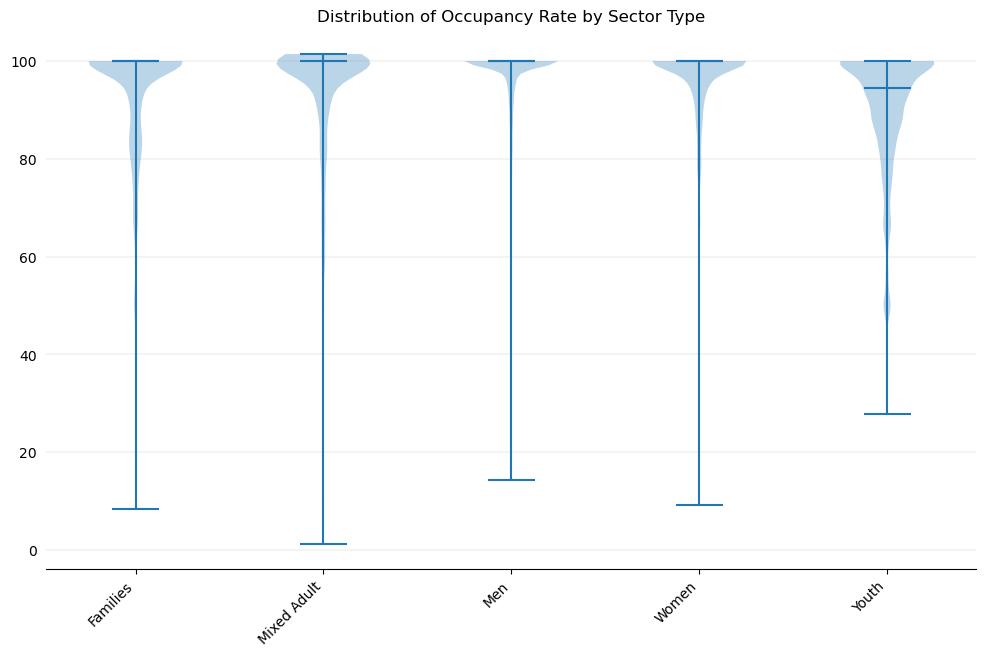

In [38]:
#Let us graph the types to observe the differences with violin plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Distribution of Occupancy Rate by Sector Type')

dataset = [or_Families, or_Mixed_Adult, or_Men, or_Women, or_Youth]

labels = df['SECTOR'].unique()

ax.violinplot(dataset, showmeans=False, showmedians=True)
ax.set_xticks(range(1, len(labels) + 1))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.show()

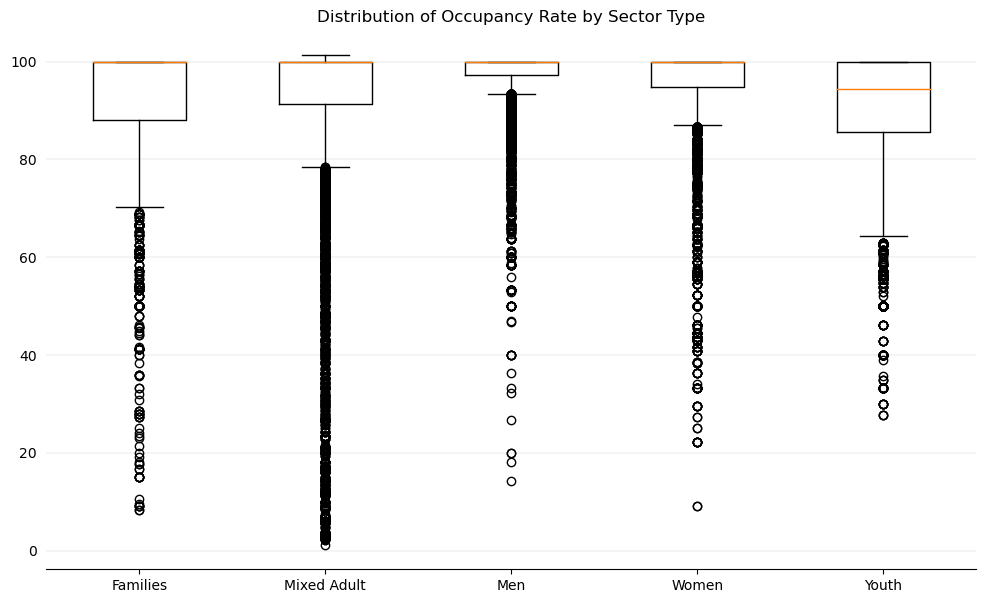

In [39]:
#Let us graph the types to observe the differences with boxplot
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Distribution of Occupancy Rate by Sector Type')

dataset = [or_Families, or_Mixed_Adult, or_Men, or_Women, or_Youth]

labels = df['SECTOR'].unique()
ax.boxplot(dataset, labels=labels)
plt.show()

In [57]:

#Let us compute the EDA's

def summary_stats(label): #Baseline function that we will use for repetition prevention purposes
    
    mean = np.round(np.mean(label), 2)
    median = np.round(np.median(label), 2)
    minval = np.round(label.min(), 2)
    maxval = np.round(label.max(), 2)
    quartile1 = np.round(label.quantile(0.25), 2)
    quartile3 = np.round(label.quantile(0.75), 2)
    iqr = np.round(quartile3 - quartile1, 2) #computations for the EDA
    
    print('Min: %s' % minval)
    print('Max: %s' % maxval)
    print('Mean: %s' % mean)
    print('25th percentile: %s' % quartile1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile3)
    print('IQR : %s' % iqr)

In [58]:
print('\nFamilies summary statistics')
summary_stats(or_Families)
print('\nMixed Adult summary statistics')
summary_stats(or_Mixed_Adult)
print('\nMen summary statistics')
summary_stats(or_Men)
print('\nWomen summary statistics')
summary_stats(or_Women)
print('\nYouth summary statistics')
summary_stats(or_Youth)


Families summary statistics
Min: 8.33
Max: 100.0
Mean: 92.15
25th percentile: 88.06
Median: 100.0
75th percentile: 100.0
IQR : 11.94

Mixed Adult summary statistics
Min: 1.2
Max: 101.41
Mean: 91.19
25th percentile: 91.36
Median: 100.0
75th percentile: 100.0
IQR : 8.64

Men summary statistics
Min: 14.29
Max: 100.0
Mean: 96.64
25th percentile: 97.37
Median: 100.0
75th percentile: 100.0
IQR : 2.63

Women summary statistics
Min: 9.09
Max: 100.0
Mean: 94.7
25th percentile: 94.74
Median: 100.0
75th percentile: 100.0
IQR : 5.26

Youth summary statistics
Min: 27.78
Max: 100.0
Mean: 89.78
25th percentile: 85.71
Median: 94.44
75th percentile: 100.0
IQR : 14.29


In [59]:
# SOME TYPE OF T-TEST
#Here the issue is that the equal variance assumption does not hold for this data since it is very skewed 
#and there is a ceiling, but the normality assumption normally wouldnt hold but due to the amount of data we have,
#which is immense, CLT kicks in.
#SO I DONT KNOW IF THIS IS REQUIRED, but I WILL COMPUTE STUDENT'S T-TESTS IN THE TRANSFORMED
#CASE AND THEN COMPUTE THE WELCH'S T-TEST FOR THE CASE WITHOUT THE TRANSFORMATIONS

#logit transformations:
epsilon = 0.001
print('\nFamilies summary statistics')
families_transformed = np.log((or_Families + epsilon) / (100 + epsilon - or_Families))
summary_stats(families_transformed)

print('\nMixed Adult summary statistics')
mixed_transformed = np.log((or_Mixed_Adult + epsilon) / (100 + epsilon - or_Mixed_Adult))
summary_stats(mixed_transformed)

print('\nMen summary statistics')
men_transformed = np.log((or_Men + epsilon) / (100 + epsilon - or_Men))
summary_stats(men_transformed)

print('\nWomen summary statistics')
women_transformed = np.log((or_Women + epsilon) / (100 + epsilon - or_Women))
summary_stats(women_transformed)

print('\nYouth summary statistics')
youth_transformed = np.log((or_Youth + epsilon) / (100 + epsilon - or_Youth))
summary_stats(youth_transformed)


Families summary statistics
Min: -2.4
Max: 11.51
Mean: 7.22
25th percentile: 2.0
Median: 11.51
75th percentile: 11.51
IQR : 9.51

Mixed Adult summary statistics
Min: -4.41
Max: 11.51
Mean: 7.12
25th percentile: 2.36
Median: nan
75th percentile: 11.51
IQR : 9.15

Men summary statistics
Min: -1.79
Max: 11.51
Mean: 8.66
25th percentile: 3.61
Median: 11.51
75th percentile: 11.51
IQR : 7.9

Women summary statistics
Min: -2.3
Max: 11.51
Mean: 7.81
25th percentile: 2.89
Median: 11.51
75th percentile: 11.51
IQR : 8.62

Youth summary statistics
Min: -0.96
Max: 11.51
Mean: 5.54
25th percentile: 1.79
Median: 2.83
75th percentile: 11.51
IQR : 9.72


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Normally, since we have 5 groups, I would have performed an ANOVA, which is also a type of t-test. But, since
#specifically simple t-tests were shown in class and emphasized in class, I will perform a t-test for each pair 
#unfortunately

In [65]:
from scipy import stats
def welch(x,y, equal_var = False):
    t_stat, p_val = stats.ttest_ind(x, y)
    print("t-statistic = " + str(t_stat))
    print("p-value = " + str(p_val))


In [66]:
#Let us perform the Welch's t-test on the untransformed data
print('families x mixed:')
print(welch(or_Families, or_Mixed_Adult))
print('\n families x men:')
print(welch(or_Families, or_Men))
print('\n families x women:')
print(welch(or_Families, or_Women))
print('\n families x youth:')
print(welch(or_Families, or_Youth))
print('\n mixed x men:')
print(welch(or_Mixed_Adult, or_Men))
print('\n mixed x women:')
print(welch(or_Mixed_Adult, or_Women))
print('\n mixed x youth:')
print(welch(or_Mixed_Adult, or_Youth))
print('\n men x women:')
print(welch(or_Men, or_Women))
print('\n men x youth:')
print(welch(or_Men, or_Youth))
print('\n women x youth:')
print(welch(or_Women, or_Youth))

families x mixed:
t-statistic = 3.635380166919683
p-value = 0.0002782283599639336
None

 families x men:
t-statistic = -28.114914204492745
p-value = 3.179556457763581e-170
None

 families x women:
t-statistic = -12.452530528365214
p-value = 2.0326687661442397e-35
None

 families x youth:
t-statistic = 10.011182852538216
p-value = 1.6348880919131454e-23
None

 mixed x men:
t-statistic = -31.412204196923323
p-value = 7.337914658349075e-213
None

 mixed x women:
t-statistic = -16.95183188587594
p-value = 4.2875342910254963e-64
None

 mixed x youth:
t-statistic = 6.241478729047828
p-value = 4.4076905411600536e-10
None

 men x women:
t-statistic = 15.257267854146386
p-value = 2.76838362506134e-52
None

 men x youth:
t-statistic = 45.87221788935044
p-value = 0.0
None

 women x youth:
t-statistic = 26.23294630532174
p-value = 8.269138707051368e-149
None


In [63]:
from scipy import stats
def ttest(x,y):
    t_stat, p_val = stats.ttest_ind(x, y)
    print("t-statistic = " + str(t_stat))
    print("p-value = " + str(p_val))


In [64]:
#Now these values seem equally varied enough for us to perform the student's t-tests.

print('families x mixed:')
print(ttest(families_transformed, mixed_transformed))
print('\n families x men:')
print(ttest(families_transformed, men_transformed))
print('\n families x women:')
print(ttest(families_transformed, women_transformed))
print('\n families x youth:')
print(ttest(families_transformed, youth_transformed))
print('\n mixed x men:')
print(ttest(mixed_transformed, men_transformed))
print('\n mixed x women:')
print(ttest(mixed_transformed, women_transformed))
print('\n mixed x youth:')
print(ttest(mixed_transformed, youth_transformed))
print('\n men x women:')
print(ttest(men_transformed, women_transformed))
print('\n men x youth:')
print(ttest(men_transformed, youth_transformed))
print('\n women x youth:')
print(ttest(women_transformed, youth_transformed))



families x mixed:
t-statistic = nan
p-value = nan
None

 families x men:
t-statistic = -20.35477575111103
p-value = 4.523948103251514e-91
None

 families x women:
t-statistic = -7.571295274559023
p-value = 3.911491026264199e-14
None

 families x youth:
t-statistic = 20.41567984690582
p-value = 2.629435646205504e-91
None

 mixed x men:
t-statistic = nan
p-value = nan
None

 mixed x women:
t-statistic = nan
p-value = nan
None

 mixed x youth:
t-statistic = nan
p-value = nan
None

 men x women:
t-statistic = 14.132579719733595
p-value = 3.8109903551162446e-45
None

 men x youth:
t-statistic = 49.6250034692818
p-value = 0.0
None

 women x youth:
t-statistic = 32.42977772075254
p-value = 4.2047727976957285e-224
None


# Observing the relation between Overnight Service Type and the Occupation Rate

In [67]:
#Now let us compute the occupancy rate for each type of ost
#First we look at the types of sectors.
unique_sectors = df['OVERNIGHT_SERVICE_TYPE'].unique()
for sector in unique_sectors:
    print(sector)

Motel/Hotel Shelter
Shelter
Interim Housing
Isolation/Recovery Site
24-Hour Respite Site
Warming Centre
24-Hour Women's Drop-in
nan


In [68]:
#get rid of 2 nan's cases previously looked at for this case
df2 = df.dropna(subset=['OVERNIGHT_SERVICE_TYPE'])

In [69]:
or_Motel_Hotel = df2[df2['OVERNIGHT_SERVICE_TYPE'] == 'Motel/Hotel Shelter']['OCCUPANCY_RATE']
or_Shelter = df2[df2['OVERNIGHT_SERVICE_TYPE'] == 'Shelter']['OCCUPANCY_RATE']
or_Interim_Housing = df2[df2['OVERNIGHT_SERVICE_TYPE'] == 'Interim Housing']['OCCUPANCY_RATE']
or_Isolation_Recovery = df2[df2['OVERNIGHT_SERVICE_TYPE'] == 'Isolation/Recovery Site']['OCCUPANCY_RATE']
or_24Hr_Respite = df2[df2['OVERNIGHT_SERVICE_TYPE'] == '24-Hour Respite Site']['OCCUPANCY_RATE']
or_Warming_Centre = df2[df2['OVERNIGHT_SERVICE_TYPE'] == 'Warming Centre']['OCCUPANCY_RATE']
or_24Hr_Womens_Dropin = df2[df2['OVERNIGHT_SERVICE_TYPE'] == '24-Hour Women\'s Drop-in']['OCCUPANCY_RATE']

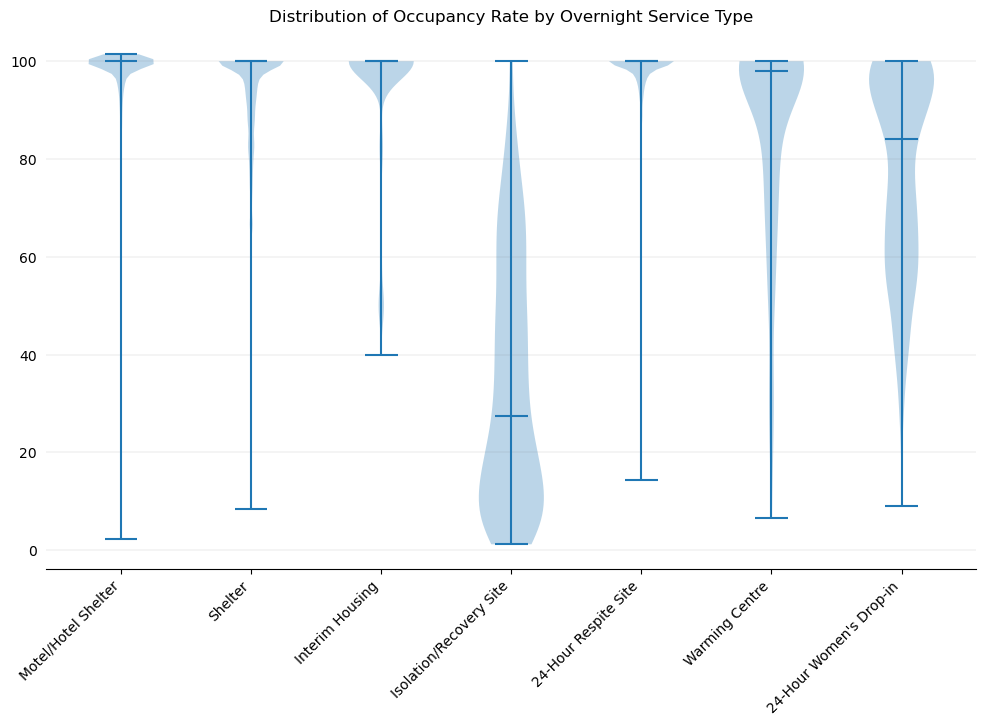

In [70]:
#Let us graph the types to observe the differences with violin plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Distribution of Occupancy Rate by Overnight Service Type')
dataset = [or_Motel_Hotel, or_Shelter, or_Interim_Housing, or_Isolation_Recovery, or_24Hr_Respite, or_Warming_Centre, or_24Hr_Womens_Dropin]
labels = ['Motel/Hotel Shelter', 'Shelter', 'Interim Housing', 'Isolation/Recovery Site', '24-Hour Respite Site', 'Warming Centre', '24-Hour Women\'s Drop-in']
ax.violinplot(dataset, showmeans=False, showmedians=True)
ax.set_xticks(range(1, len(labels) + 1))
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.show()

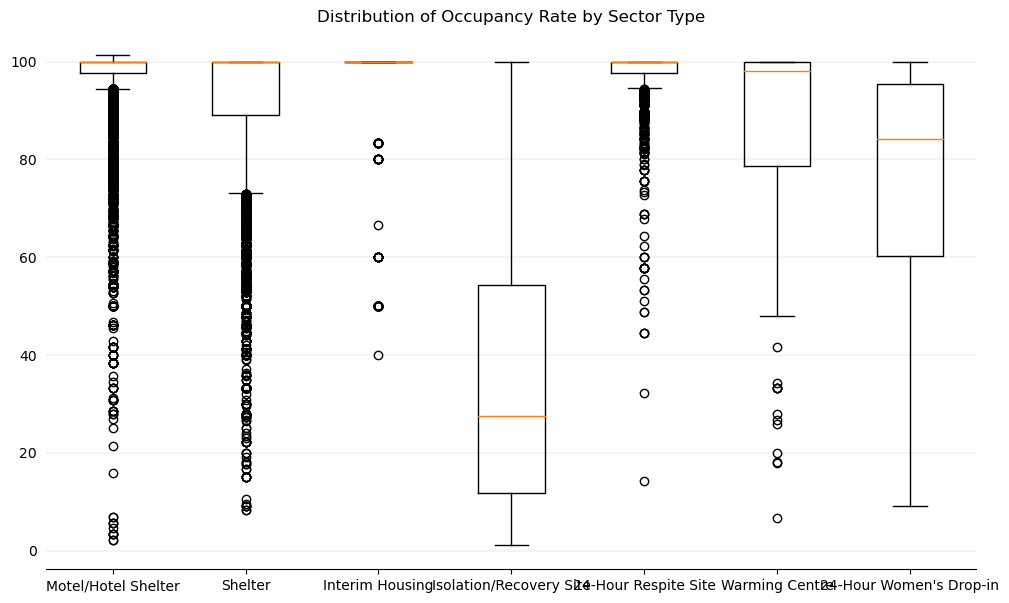

In [71]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Distribution of Occupancy Rate by Sector Type')
dataset = [or_Motel_Hotel, or_Shelter, or_Interim_Housing, or_Isolation_Recovery, or_24Hr_Respite, or_Warming_Centre, or_24Hr_Womens_Dropin]
labels = ['Motel/Hotel Shelter', 'Shelter', 'Interim Housing', 'Isolation/Recovery Site', '24-Hour Respite Site', 'Warming Centre', '24-Hour Women\'s Drop-in']
ax.boxplot(dataset, labels=labels)
plt.show()

In [72]:
print('\nMotel/Hotel Shelter summary statistics')
summary_stats(or_Motel_Hotel)
print('\nShelter summary statistics')
summary_stats(or_Shelter)
print('\nInterim Housing summary statistics')
summary_stats(or_Interim_Housing)
print('\nIsolation/Recovery Site summary statistics')
summary_stats(or_Isolation_Recovery)
print('\n24-Hour Respite Site summary statistics')
summary_stats(or_24Hr_Respite)
print('\nWarming Centre summary statistics')
summary_stats(or_Warming_Centre)
print('\n24-Hour Women\'s Drop-in summary statistics')
summary_stats(or_24Hr_Womens_Dropin)


Motel/Hotel Shelter summary statistics
Min: 2.27
Max: 101.41
Mean: 96.8
25th percentile: 97.78
Median: 100.0
75th percentile: 100.0
IQR : 2.22

Shelter summary statistics
Min: 8.33
Max: 100.0
Mean: 92.55
25th percentile: 89.19
Median: 100.0
75th percentile: 100.0
IQR : 10.81

Interim Housing summary statistics
Min: 40.0
Max: 100.0
Mean: 94.86
25th percentile: 100.0
Median: 100.0
75th percentile: 100.0
IQR : 0.0

Isolation/Recovery Site summary statistics
Min: 1.2
Max: 100.0
Mean: 33.92
25th percentile: 11.76
Median: 27.5
75th percentile: 54.27
IQR : 42.51

24-Hour Respite Site summary statistics
Min: 14.29
Max: 100.0
Mean: 97.94
25th percentile: 97.78
Median: 100.0
75th percentile: 100.0
IQR : 2.22

Warming Centre summary statistics
Min: 6.67
Max: 100.0
Mean: 85.86
25th percentile: 78.63
Median: 98.0
75th percentile: 100.0
IQR : 21.37

24-Hour Women's Drop-in summary statistics
Min: 9.09
Max: 100.0
Mean: 77.37
25th percentile: 60.22
Median: 84.09
75th percentile: 95.45
IQR : 35.23


In [73]:
# SOME TYPE OF T-TEST
#Here the issue is that the equal variance assumption does not hold for this data since it is very skewed 
#and there is a ceiling, but the normality assumption normally wouldnt hold but due to the amount of data we have,
#which is immense, CLT kicks in.
#SO I DONT KNOW IF THIS IS REQUIRED, but I WILL COMPUTE STUDENT'S T-TESTS IN THE TRANSFORMED
#CASE AND THEN COMPUTE THE WELCH'S T-TEST FOR THE CASE WITHOUT THE TRANSFORMATIONS

#logit transformations:

epsilon = 0.001
transformations = {
    'Motel/Hotel Shelter': np.log((or_Motel_Hotel + epsilon) / (100 + epsilon - or_Motel_Hotel)),
    'Shelter': np.log((or_Shelter + epsilon) / (100 + epsilon - or_Shelter)),
    'Interim Housing': np.log((or_Interim_Housing + epsilon) / (100 + epsilon - or_Interim_Housing)),
    'Isolation/Recovery Site': np.log((or_Isolation_Recovery + epsilon) / (100 + epsilon - or_Isolation_Recovery)),
    '24-Hour Respite Site': np.log((or_24Hr_Respite + epsilon) / (100 + epsilon - or_24Hr_Respite)),
    'Warming Centre': np.log((or_Warming_Centre + epsilon) / (100 + epsilon - or_Warming_Centre)),
    '24-Hour Women\'s Drop-in': np.log((or_24Hr_Womens_Dropin + epsilon) / (100 + epsilon - or_24Hr_Womens_Dropin))
}
for service_type, transformed_data in transformations.items():
    print(f'\n{service_type} summary statistics:')
    summary_stats(transformed_data)


Motel/Hotel Shelter summary statistics:
Min: -3.76
Max: 11.51
Mean: 8.65
25th percentile: 3.78
Median: nan
75th percentile: 11.51
IQR : 7.73

Shelter summary statistics:
Min: -2.4
Max: 11.51
Mean: 6.87
25th percentile: 2.11
Median: 11.51
75th percentile: 11.51
IQR : 9.4

Interim Housing summary statistics:
Min: -0.41
Max: 11.51
Mean: 10.01
25th percentile: 11.51
Median: 11.51
75th percentile: 11.51
IQR : 0.0

Isolation/Recovery Site summary statistics:
Min: -4.41
Max: 11.51
Mean: -0.87
25th percentile: -2.02
Median: -0.97
75th percentile: 0.17
IQR : 2.19

24-Hour Respite Site summary statistics:
Min: -1.79
Max: 11.51
Mean: 8.76
25th percentile: 3.78
Median: 11.51
75th percentile: 11.51
IQR : 7.73

Warming Centre summary statistics:
Min: -2.64
Max: 11.51
Mean: 6.01
25th percentile: 1.3
Median: 3.89
75th percentile: 11.51
IQR : 10.21

24-Hour Women's Drop-in summary statistics:
Min: -2.3
Max: 11.51
Mean: 3.42
25th percentile: 0.42
Median: 1.66
75th percentile: 3.04
IQR : 2.62


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [74]:
#Let us perform the Welch's t-test on the untransformed data
service_types = list(transformations.keys())
for i in range(len(service_types)):
    for j in range(i + 1, len(service_types)):
        service1, service2 = service_types[i], service_types[j]
        print(f'\n{service1} x {service2} (Welch\'s t-test):')
        print(stats.ttest_ind(df2[df2['OVERNIGHT_SERVICE_TYPE'] == service1]['OCCUPANCY_RATE'], 
                              df2[df2['OVERNIGHT_SERVICE_TYPE'] == service2]['OCCUPANCY_RATE'], 
                              equal_var=False))


Motel/Hotel Shelter x Shelter (Welch's t-test):
Ttest_indResult(statistic=43.027688800906105, pvalue=0.0)

Motel/Hotel Shelter x Interim Housing (Welch's t-test):
Ttest_indResult(statistic=3.6771176144843287, pvalue=0.00025281055036428227)

Motel/Hotel Shelter x Isolation/Recovery Site (Welch's t-test):
Ttest_indResult(statistic=69.6007604838709, pvalue=0.0)

Motel/Hotel Shelter x 24-Hour Respite Site (Welch's t-test):
Ttest_indResult(statistic=-9.244462029304595, pvalue=3.153025081447128e-20)

Motel/Hotel Shelter x Warming Centre (Welch's t-test):
Ttest_indResult(statistic=6.992330901637262, pvalue=4.6602820435815026e-11)

Motel/Hotel Shelter x 24-Hour Women's Drop-in (Welch's t-test):
Ttest_indResult(statistic=21.23951780106541, pvalue=1.4698104664636513e-72)

Shelter x Interim Housing (Welch's t-test):
Ttest_indResult(statistic=-4.377341651908567, pvalue=1.3734065090297834e-05)

Shelter x Isolation/Recovery Site (Welch's t-test):
Ttest_indResult(statistic=64.91165282758058, pvalue=

In [76]:
#Now these values seem equally varied enough for us to perform the student's t-tests.
for i in range(len(service_types)):
    for j in range(i + 1, len(service_types)):
        service1, service2 = service_types[i], service_types[j]
        print(f'\n{service1} x {service2} (Student\'s t-test):')
        print(stats.ttest_ind(transformations[service1], transformations[service2]))


Motel/Hotel Shelter x Shelter (Student's t-test):
Ttest_indResult(statistic=nan, pvalue=nan)

Motel/Hotel Shelter x Interim Housing (Student's t-test):
Ttest_indResult(statistic=nan, pvalue=nan)

Motel/Hotel Shelter x Isolation/Recovery Site (Student's t-test):
Ttest_indResult(statistic=nan, pvalue=nan)

Motel/Hotel Shelter x 24-Hour Respite Site (Student's t-test):
Ttest_indResult(statistic=nan, pvalue=nan)

Motel/Hotel Shelter x Warming Centre (Student's t-test):
Ttest_indResult(statistic=nan, pvalue=nan)

Motel/Hotel Shelter x 24-Hour Women's Drop-in (Student's t-test):
Ttest_indResult(statistic=nan, pvalue=nan)

Shelter x Interim Housing (Student's t-test):
Ttest_indResult(statistic=-17.535613571966636, pvalue=1.5972357405130718e-68)

Shelter x Isolation/Recovery Site (Student's t-test):
Ttest_indResult(statistic=45.21113732156426, pvalue=0.0)

Shelter x 24-Hour Respite Site (Student's t-test):
Ttest_indResult(statistic=-20.94576814792721, pvalue=8.241121391461528e-97)

Shelter x 

# Observing the relation between Season and the Occupation Rate

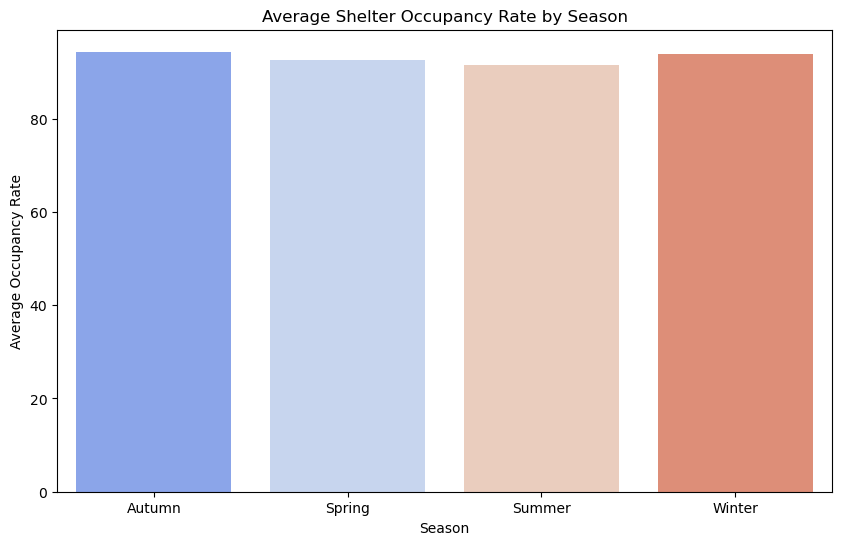

In [80]:
import seaborn as sns
#I also want to see if there are particular times of year when occupancy spikes and that whether or not there are
#certain types of shelters that are more likely to be over capacity

# Group by Season and calculate average occupancy rate
average_occupancy_by_season = df.groupby('SEASON')['OCCUPANCY_RATE'].mean().reset_index()

# Assuming 'Shelter_Type' is the column indicating the type of each shelter
average_occupancy_by_shelter_and_season = df.groupby(['OVERNIGHT_SERVICE_TYPE', 'SEASON'])['OCCUPANCY_RATE'].mean().unstack().reset_index()

# Bar chart for average occupancy rate by season
plt.figure(figsize=(10, 6))
sns.barplot(x='SEASON', y='OCCUPANCY_RATE', data=average_occupancy_by_season, palette='coolwarm')
plt.title('Average Shelter Occupancy Rate by Season')
plt.xlabel('Season')
plt.ylabel('Average Occupancy Rate')
plt.show()

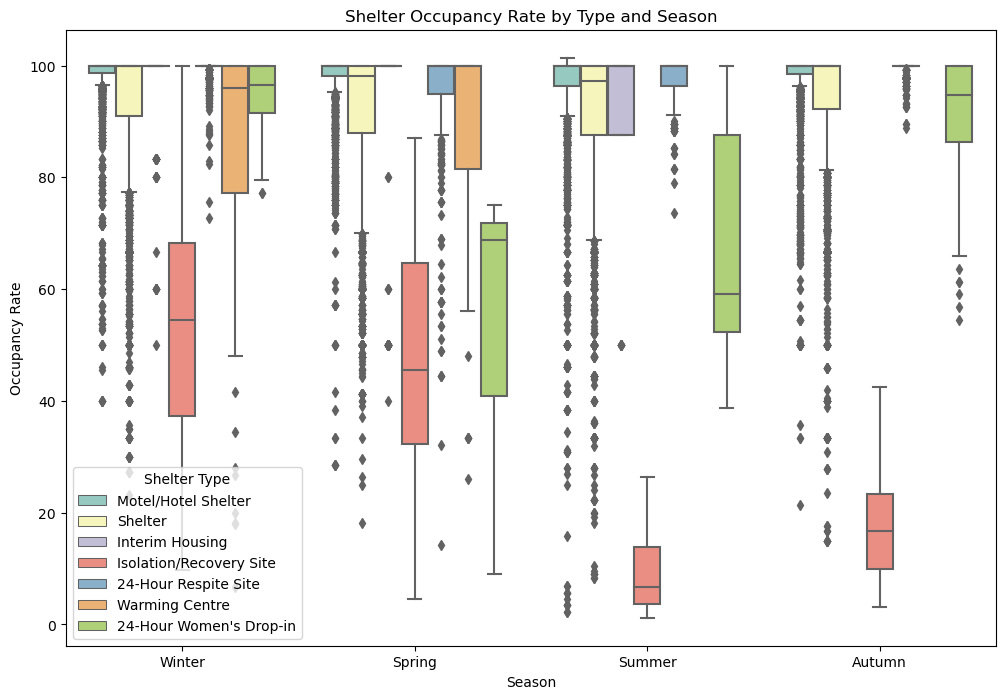

In [81]:
# Box plot for occupancy rates by shelter type and season
plt.figure(figsize=(12, 8))
sns.boxplot(x='SEASON', y='OCCUPANCY_RATE', hue='OVERNIGHT_SERVICE_TYPE', data=df, palette='Set3')
plt.title('Shelter Occupancy Rate by Type and Season')
plt.xlabel('Season')
plt.ylabel('Occupancy Rate')
plt.legend(title='Shelter Type')
plt.show()